<a href="https://colab.research.google.com/github/ramirojc/Mentoria/blob/master/2_1_TPractico2_ExploracionCuracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduccion, Analisis y Curacion de Datos

## Diplodatos 2020, Mentorias
### Mentor: Ramiro Caro

In [1]:
"""
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx
!pip install contextily
!pip install xlrd
"""

'\n!pip install geopandas\n!apt install libspatialindex-dev\n!pip install rtree\n!pip install osmnx\n!pip install contextily\n!pip install xlrd\n'

## Introduccion, carga de datos

A partir de este punto, utilizaremos los transformadores de distribucion como elemnto de analisis, e incorporaremos datos de consumidores, subestacion y lineas de distribucion.

In [2]:
import contextily as ctx
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import seaborn as sns

from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

from utils import display_markdown, print_progress_bar

In [3]:
# Editar con el path correspondiente a sus datos
data_path = '../../Mentoria/data/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [4]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd = untrd.to_crs(epsg=31984)
untrd.shape, untrd.columns

/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [5]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [6]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [7]:
segcon = gpd.read_file(data_path, driver='FileGDB', layer='SEGCON')
segcon.columns, segcon.columns

(Index(['COD_ID', 'DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2',
        'MAT_FAS_3', 'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3',
        'ISO_NEU', 'CND_FAS', 'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS',
        'TUC_FAS', 'A1_FAS', 'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS',
        'CM_NEU', 'TUC_NEU', 'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU',
        'A6_NEU', 'DESCR', 'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU',
        'geometry'],
       dtype='object'),
 Index(['COD_ID', 'DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2',
        'MAT_FAS_3', 'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3',
        'ISO_NEU', 'CND_FAS', 'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS',
        'TUC_FAS', 'A1_FAS', 'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS',
        'CM_NEU', 'TUC_NEU', 'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU',
        'A6_NEU', 'DESCR', 'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU',
        'geometry'],
       dtype='

In [8]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt.columns, ucbt.columns

(Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
        'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'DAT_CON', 'CAR_INST', 'LIV',
        'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
        'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'DIC', 'FIC',
        'SEMRED', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'),
 Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
        'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'DAT_CON', 'CAR_INST', 'LIV',
        'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
        'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'DIC', 'FIC',
        'SEMRED', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [9]:
epsg = 31984

untrd = untrd.to_crs(epsg=epsg)
untrs = untrs.to_crs(epsg=epsg)
ssmt = ssmt.to_crs(epsg=epsg)
# segcon = segcon.to_crs(epsg=epsg)
ucbt = ucbt.to_crs(epsg=epsg)

/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the prefer

## Información sobre consumidores

1 - En base a los resultados obtenidos en el practico 1. Defina que informacion sobre consumidores, es la mas relevante para la estimacion de calidad de servicio.

La información que creo es más relevante involucra:
* Ubicación geográfica del consumidor, ya que la calidad varía de acuerdo a si la zona es urbana o rural (variables CONJ, MUN, BRR, CEP, ARE_LOC).
* Cantidad de consumo, ya que las unidades que consumen más parecen ser las que más cortes sufren (variables ENE_*).
* Actividad económica realizada por el consumidor, ya que hay algunas actividades que consumen más que otras, y unidades que varían en frecuencia de corte de acuerdo a la actividad económica (variable CNAE).
* Frecuencia y duración de los cortes (variables DIC y FIC).

In [10]:
ene_col_names = ['ENE_{:02}'.format(i) for i in range(1, 13)]
ucbt_relevant_num_col_names = ene_col_names + ['DIC', 'FIC']
ucbt_relevant_col_names = (
    ['UNI_TR_D', 'UNI_TR_S', 'CONJ', 'MUN', 'BRR', 'CEP', 'ARE_LOC', 'CNAE'] +
    ucbt_relevant_num_col_names
)

2 - Realice el tratamiento de las filas con valores invalidos y outliers, y luego agrupe los datos en base a la variable UNI_TF_D.

¿Qué tan completo está `ucbt`? Veamos proporciones de cantidades de filas sin datos nulos:

In [11]:
total_len = len(ucbt)
len_without_na = len(ucbt.dropna())
prop = len_without_na / total_len
display_markdown('{} / {} = **{:.2%}**'.format(len_without_na, total_len, prop))
"""
if prop < 1.0:
    display_markdown('Valores nulos por columna:')
    missing_values_count = dataframe.isnull().sum()
    for key, value in missing_values_count[missing_values_count > 0].items():
        display_markdown('* **{}** tiene {} valores nulos'.format(key, value))
    print()
""";

148801 / 148801 = **100.00%**

Vemos que el conjunto de datos está completo.

Ahora veamos qué cantidad de valores atípicos hay en `ucbt`:

In [12]:
for col_name in ucbt[ucbt_relevant_num_col_names]:
    value_is_outlier = (
        (ucbt[col_name] - ucbt[col_name].mean()).abs() > 3 * ucbt[col_name].std()
    )
    outliers_len = len(ucbt[col_name][value_is_outlier])
    total_len = len(ucbt[col_name])
    display_markdown('* **{}**: {} / {} = **{:.2%}**'.format(
        col_name,
        outliers_len,
        total_len,
        outliers_len / total_len
    ))

* **ENE_01**: 77 / 148801 = **0.05%**

* **ENE_02**: 99 / 148801 = **0.07%**

* **ENE_03**: 75 / 148801 = **0.05%**

* **ENE_04**: 81 / 148801 = **0.05%**

* **ENE_05**: 75 / 148801 = **0.05%**

* **ENE_06**: 69 / 148801 = **0.05%**

* **ENE_07**: 70 / 148801 = **0.05%**

* **ENE_08**: 69 / 148801 = **0.05%**

* **ENE_09**: 78 / 148801 = **0.05%**

* **ENE_10**: 75 / 148801 = **0.05%**

* **ENE_11**: 90 / 148801 = **0.06%**

* **ENE_12**: 79 / 148801 = **0.05%**

* **DIC**: 2976 / 148801 = **2.00%**

* **FIC**: 1652 / 148801 = **1.11%**

Vemos que hay más valores atípicos en las columnas DIC y FIC. Hagamos gráficos de caja de estas varaibles:

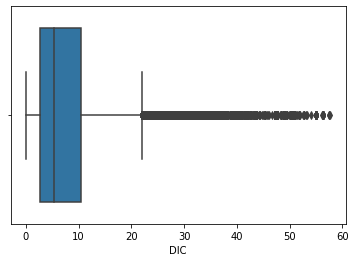

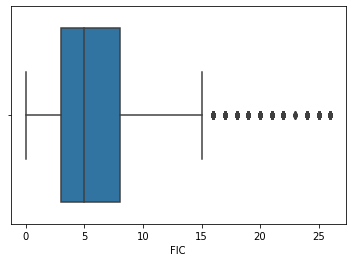

In [13]:
plt.figure()
sns.boxplot(ucbt.DIC)
plt.figure()
sns.boxplot(ucbt.FIC)

¿Qué tal si graficamos las variables sin valores atípicos?

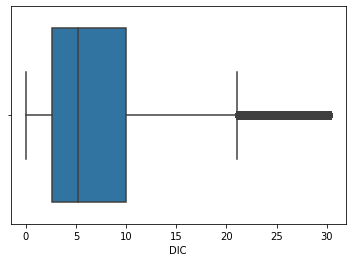

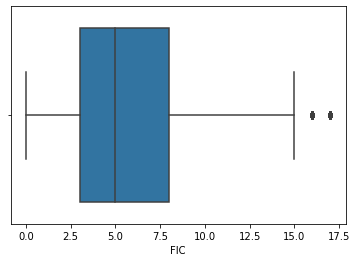

In [14]:
dic_is_outlier = (ucbt.DIC - ucbt.DIC.mean()).abs() > 3 * ucbt.DIC.std()
fic_is_outlier = (ucbt.FIC - ucbt.FIC.mean()).abs() > 3 * ucbt.FIC.std()

plt.figure()
sns.boxplot(ucbt[~dic_is_outlier].DIC)
plt.figure()
sns.boxplot(ucbt[~fic_is_outlier].FIC)

Así se ve mejor.

Eliminemos los consumidores que tengan valores atípicos en DIC o en FIC y quedémonos sólo con las columnas que nos interesan. Además, agrupemos a los consumidores por transformador de distribución:

In [15]:
clean_ucbt = ucbt[~dic_is_outlier & ~fic_is_outlier][ucbt_relevant_col_names]

agg_dict = {
    'UNI_TR_S': 'first',
    'DIC': 'median',
    'FIC': 'median',
    'CNAE': pd.Series.mode
}
for ene_col_name in ene_col_names:
    agg_dict[ene_col_name] = 'sum'
ext_untrd = clean_ucbt.groupby('UNI_TR_D').agg(agg_dict)

ext_untrd = untrd[['COD_ID', 'CONJ', 'MUN', 'ARE_LOC', 'geometry']].merge(ext_untrd, left_on='COD_ID', right_on='UNI_TR_D')

ext_untrd

,COD_ID,CONJ,MUN,ARE_LOC,geometry,UNI_TR_S,DIC,FIC,CNAE,ENE_01,...,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12
0,4_1040341,12737,2805802,NU,POINT (627712.617 8776098.670),1_SESAQ_1,7.050,8.0,0,147.0,...,150.0,115.0,140.0,162.0,148.0,202.0,204.0,189.0,195.0,160.0
1,4_1040306,12737,2805802,NU,POINT (626353.418 8777498.606),1_SESAQ_1,5.470,7.0,0,275.0,...,263.0,256.0,204.0,367.0,275.0,241.0,278.0,247.0,296.0,287.0
2,4_1040035,12737,2805802,NU,POINT (635724.137 8773322.662),1_SESAQ_1,7.130,7.0,0,1732.0,...,1413.0,1647.0,1632.0,1553.0,1590.0,1554.0,1773.0,1623.0,1871.0,1456.0
3,13_1130368,12743,2917904,NU,POINT (631104.558 8720058.235),2_SETMG_1,9.965,6.0,0,2026.0,...,2199.0,1923.0,2929.0,2216.0,1782.0,3007.0,3407.0,2763.0,3321.0,2949.0
4,4_1040036,12737,2805802,NU,POINT (638696.486 8773991.732),1_SESAQ_1,5.190,6.0,0,692.0,...,604.0,697.0,728.0,577.0,544.0,593.0,590.0,532.0,653.0,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8828,14_1141247,12743,2927002,NU,POINT (626315.918 8721661.183),2_SETMG_1,13.990,8.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,51.0,164.0,108.0,57.0
8829,8_1080557,12730,2802809,NU,POINT (673768.068 8730109.019),1_SECON_1,11.435,6.0,0,69.0,...,58.0,57.0,91.0,103.0,86.0,91.0,110.0,107.0,97.0,115.0
8830,2_1020110,15600,2800670,UB,POINT (651696.927 8768311.258),2_SEAUA_1,1.900,1.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,73.0,67.0
8831,9_2090010,12730,2806305,NU,POINT (672089.772 8741871.181),1_SECON_1,10.600,5.0,3600601,1557.0,...,1611.0,1521.0,1711.0,1487.0,1502.0,1639.0,1719.0,1592.0,1630.0,1028.0


3 - Justifique los metodos utilizados para agrupar las variables numericas y categoricas.

Con respecto a las variables numéricas decido:
* sumar las de consumo de energía (`ENE_*`) para así tener cantidad de energía activa de cada transformador por período,
* sacar medidas de tendencia central tanto para `DIC` como para `FIC` para tener una idea de más o menos cuánto duran los cortes y qué tan frecuentes son en cada transformador, respectivamente. Dadas las formas de las distribuciones de `DIC` y `FIC` (no simétricas, la primera tal vez con forma de Possion y la segunda con forma exponencial o gamma), la medianas me parecen más adecuadas que las medias ya que estas últimas se ven bastante afectadas por valores muy grandes.

Con respecto a las variables categóricas, me quedo con:
* unidad transformadora de segmentación (`UNI_TR_S`) para la cual elijo el primer elemento del grupo, ya que cada unidad transformadora de distribución tiene exactamente una unidad transformadora de segmentación.
* actividad económica (`CNAE`) para la cual elijo la moda como actividad principal por cada transformador.

A `CONJ`, `MUN` y `ARE_LOC` las saco de `untrd` haciendo `merge`.

## Informacion sobre subestacion

4 - Analise la informacion disponible sobre los transformadores de segmentacion (UNI_TR_S > UNTRS)

In [16]:
print(untrs.shape)
untrs.describe()

(17, 53)


,DIST,POT_NOM,POT_F01,POT_F02,PER_FER,PER_TOT,BANC,CONJ,ENES_01,ENES_02,...,ENET_03,ENET_04,ENET_05,ENET_06,ENET_07,ENET_08,ENET_09,ENET_10,ENET_11,ENET_12
count,17.0,17.000000,17.0,17.0,17.000000,17.000000,17.0,17.000000,1.700000e+01,1.700000e+01,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,46.0,6.764706,0.0,0.0,0.131765,0.608824,0.0,14084.529412,1.397955e+07,1.426265e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,3.509441,0.0,0.0,0.082404,0.175957,0.0,1473.628520,4.635029e+06,4.650536e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,46.0,5.000000,0.0,0.0,0.100000,0.530000,0.0,12730.000000,1.041005e+07,1.067506e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,46.0,5.000000,0.0,0.0,0.100000,0.530000,0.0,12737.000000,1.160140e+07,1.165818e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,46.0,5.000000,0.0,0.0,0.100000,0.530000,0.0,12743.000000,1.290811e+07,1.340045e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,46.0,5.000000,0.0,0.0,0.100000,0.530000,0.0,15601.000000,1.352022e+07,1.388548e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,46.0,15.000000,0.0,0.0,0.350000,1.060000,0.0,15602.000000,2.589224e+07,2.617161e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
n_cols_p_step = 6
for i in range(0, len(untrs.columns), n_cols_p_step):
    col_names = untrs.columns[i:i + n_cols_p_step]
    print(untrs[col_names])
    print(untrs[col_names].nunique())
    print()

       COD_ID    SUB   BARR_1   BARR_2   BARR_3        PAC_1
0   2_SETMG_1  SETMG  SETMG_1  SETMG_1           SETMG_1_2_2
1   1_SEITI_1  SEITI  SEITI_1  SEITI_1           SEITI_1_1_2
2   2_SEAUA_1  SEAUA  SEAUA_1  SEAUA_1           SEAUA_1_2_2
3   1_SETMG_1  SETMG  SETMG_1  SETMG_1           SETMG_1_1_2
4   1_SEAUA_1  SEAUA  SEAUA_1  SEAUA_1  SEAUA_2  SEAUA_1_1_2
5   2_SEITI_1  SEITI  SEITI_1  SEITI_1           SEITI_1_2_2
6   1_SESAQ_1  SESAQ  SESAQ_1  SESAQ_1           SESAQ_1_1_2
7   1_SECON_1  SECON  SECON_1  SECON_1           SECON_1_1_2
8   3_SEITI_1  SEITI  SEITI_1  SEITI_1           SEITI_1_3_2
9   2_SESAQ_1  SESAQ  SESAQ_1  SESAQ_1           SESAQ_1_2_2
10  3_SETMG_1  SETMG  SETMG_1  SETMG_1           SETMG_1_3_2
11  3_SESAQ_1  SESAQ  SESAQ_1  SESAQ_1           SESAQ_1_3_2
12  3_SEAUA_1  SEAUA  SEAUA_1  SEAUA_1           SEAUA_1_3_2
13  3_SECON_1  SECON  SECON_1  SECON_1           SECON_1_3_2
14  2_SECON_1  SECON  SECON_1  SECON_1           SECON_1_2_2
15  1_SEEST_1  SEEST  SE

5 - Seleccione las variables relevantes, realize tratamiento de valores invalidos y outliers correspondientes. Agrupe los valores por UNTRD y agregue al dataset.

In [18]:
enes_col_names = ['ENES_{:02}'.format(i) for i in range(1, 13)]
untrs_relevant_col_names = ['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3',
                            'POT_NOM', 'PER_FER', 'PER_TOT', 'DAT_CON',
                            'CONJ', 'MUN', 'geometry'] + enes_col_names

clean_untrs = untrs[untrs_relevant_col_names]

dataframe = ext_untrd.merge(clean_untrs.add_prefix('TR_S_'), left_on='UNI_TR_S', right_on='TR_S_COD_ID')

dataframe

,COD_ID,CONJ,MUN,ARE_LOC,geometry,UNI_TR_S,DIC,FIC,CNAE,ENE_01,...,TR_S_ENES_03,TR_S_ENES_04,TR_S_ENES_05,TR_S_ENES_06,TR_S_ENES_07,TR_S_ENES_08,TR_S_ENES_09,TR_S_ENES_10,TR_S_ENES_11,TR_S_ENES_12
0,4_1040341,12737,2805802,NU,POINT (627712.617 8776098.670),1_SESAQ_1,7.050,8.0,0,147.0,...,13310184.0,13444950.0,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0
1,4_1040306,12737,2805802,NU,POINT (626353.418 8777498.606),1_SESAQ_1,5.470,7.0,0,275.0,...,13310184.0,13444950.0,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0
2,4_1040035,12737,2805802,NU,POINT (635724.137 8773322.662),1_SESAQ_1,7.130,7.0,0,1732.0,...,13310184.0,13444950.0,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0
3,4_1040036,12737,2805802,NU,POINT (638696.486 8773991.732),1_SESAQ_1,5.190,6.0,0,692.0,...,13310184.0,13444950.0,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0
4,4_1040038,12737,2805802,NU,POINT (638310.799 8773035.106),1_SESAQ_1,5.840,7.0,0,1297.0,...,13310184.0,13444950.0,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8828,8_1080578,12730,2802809,NU,POINT (653013.399 8739601.889),1_SECON_1,21.510,10.0,0,1206.0,...,9629278.0,9519481.0,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0
8829,8_1080577,12730,2802809,NU,POINT (653309.344 8739968.353),1_SECON_1,21.510,10.0,0,1469.0,...,9629278.0,9519481.0,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0
8830,12_1120421,12730,2807600,NU,POINT (644710.911 8734252.079),1_SECON_1,21.130,9.0,0,189.0,...,9629278.0,9519481.0,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0
8831,8_1080557,12730,2802809,NU,POINT (673768.068 8730109.019),1_SECON_1,11.435,6.0,0,69.0,...,9629278.0,9519481.0,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0


## Generacion de variables en base a puntos de referencia

5 - Calcule la distancia euclideana de cada untrd al correspondiente untrs y adicione al dataset.

In [19]:
dataframe['DIST_TR'] = dataframe.distance(dataframe.TR_S_geometry[0])

dataframe.DIST_TR

0        6030.232571
1        6839.156041
2       11259.764183
3       14306.485778
4       13746.532291
            ...     
8828    42143.632643
8829    42073.014416
8830    41695.421886
8831    63749.096643
8832    55516.393935
Name: DIST_TR, Length: 8833, dtype: float64

6 - Cree una variable que sea la distancia media a los tres centros urbanos mas cercanos.

In [21]:
bra_mun_dataframe = pd.read_excel('data/DTB_2018/RELATORIO_DTB_BRASIL_MUNICIPIO.xls',
                                  index_col=6)
bra_mun_dataframe.columns = ['uf', 'nome_uf', 'mesorregiao_geografica',
                             'nome_mesorregiao', 'microrregiao_geografica',
                             'nome_microrregiao', 'codigo_completo', 'nome']
bra_mun_dataframe['codigo_completo'] = bra_mun_dataframe['codigo_completo'].apply(str)
dataframe['MUN_NOME'] = dataframe[['MUN']].merge(bra_mun_dataframe,
                                                 left_on='MUN',
                                                 right_on='codigo_completo')['nome']

dataframe

,COD_ID,CONJ,MUN,ARE_LOC,geometry,UNI_TR_S,DIC,FIC,CNAE,ENE_01,...,TR_S_ENES_05,TR_S_ENES_06,TR_S_ENES_07,TR_S_ENES_08,TR_S_ENES_09,TR_S_ENES_10,TR_S_ENES_11,TR_S_ENES_12,DIST_TR,MUN_NOME
0,4_1040341,12737,2805802,NU,POINT (627712.617 8776098.670),1_SESAQ_1,7.050,8.0,0,147.0,...,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0,6030.232571,Riachão do Dantas
1,4_1040306,12737,2805802,NU,POINT (626353.418 8777498.606),1_SESAQ_1,5.470,7.0,0,275.0,...,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0,6839.156041,Riachão do Dantas
2,4_1040035,12737,2805802,NU,POINT (635724.137 8773322.662),1_SESAQ_1,7.130,7.0,0,1732.0,...,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0,11259.764183,Riachão do Dantas
3,4_1040036,12737,2805802,NU,POINT (638696.486 8773991.732),1_SESAQ_1,5.190,6.0,0,692.0,...,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0,14306.485778,Riachão do Dantas
4,4_1040038,12737,2805802,NU,POINT (638310.799 8773035.106),1_SESAQ_1,5.840,7.0,0,1297.0,...,13191438.0,12313358.0,11755778.0,12337156.0,12848866.0,12691834.0,13943276.0,13033788.0,13746.532291,Riachão do Dantas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8828,8_1080578,12730,2802809,NU,POINT (653013.399 8739601.889),1_SECON_1,21.510,10.0,0,1206.0,...,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0,42143.632643,Umbaúba
8829,8_1080577,12730,2802809,NU,POINT (653309.344 8739968.353),1_SECON_1,21.510,10.0,0,1469.0,...,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0,42073.014416,Umbaúba
8830,12_1120421,12730,2807600,NU,POINT (644710.911 8734252.079),1_SECON_1,21.130,9.0,0,189.0,...,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0,41695.421886,Umbaúba
8831,8_1080557,12730,2802809,NU,POINT (673768.068 8730109.019),1_SECON_1,11.435,6.0,0,69.0,...,8886469.0,8563985.0,7908330.0,8312732.0,8856697.0,8965352.0,9627315.0,9212908.0,63749.096643,Umbaúba


In [23]:
"""
# Generate geo dataframe with urban areas from Sergipe and save to file.
sergipe_mun_names = [
    '{}, Sergipe, Brazil'.format(name)
    for name in bra_mun_dataframe[bra_mun_dataframe.nome_uf == 'Sergipe'].nome
]
sergipe_mun_dataframe = ox.geocode_to_gdf(sergipe_mun_names)
sergipe_mun_dataframe = bra_mun_dataframe.to_crs(epsg=epsg)
sergipe_mun_dataframe.to_file('data/sergipe_municipios.geojson',
                              driver='GeoJSON')
"""
sergipe_mun_dataframe = gpd.read_file('data/sergipe_municipios.geojson',
                                      driver='GeoJSON')
sergipe_mun_dataframe

,place_name,bbox_north,bbox_south,bbox_east,bbox_west,geometry
0,"Amparo de São Francisco, Microrregião do Baixo...",-10.120371,-10.227431,-36.878676,-36.943138,"POLYGON ((725309.939 8868723.451, 729747.597 8..."
1,"Aquidabã, Microrregião do Médio Sertão Sergipa...",-10.165000,-10.374745,-36.929081,-37.165888,"POLYGON ((700835.689 8857369.683, 700887.083 8..."
2,"Aracaju, Microrregião da Grande Aracaju, Regiã...",-10.862221,-11.161242,-37.026000,-37.174000,"POLYGON ((699458.788 8774895.816, 699673.252 8..."
3,"Arauá, Microrregião do Sul Sergipano, Região G...",-11.165850,-11.343310,-37.506219,-37.670896,"POLYGON ((645090.808 8757378.860, 645098.802 8..."
4,"Areia Branca, Microrregião do Agreste Central ...",-10.720468,-10.852351,-37.244357,-37.406404,"POLYGON ((674209.270 8802115.016, 674237.808 8..."
...,...,...,...,...,...,...
70,"Siriri, Microrregião do Leste Sergipano, Regiã...",-10.470070,-10.650071,-37.064843,-37.205953,"POLYGON ((696274.992 8827133.661, 696283.928 8..."
71,"Telha, Microrregião do Baixo São Francisco Ser...",-10.140669,-10.228000,-36.845565,-36.943138,"POLYGON ((725309.939 8868723.451, 726853.774 8..."
72,"Tobias Barreto, Microrregião do Centro Sul Ser...",-10.815231,-11.348547,-37.793000,-38.186852,"POLYGON ((588845.305 8788009.493, 588893.275 8..."
73,"Tomar do Geru, Microrregião do Sul Sergipano, ...",-11.252991,-11.482539,-37.747020,-37.982957,"POLYGON ((610977.731 8745048.032, 611005.735 8..."


In [ ]:
sergipe_mun_dataframe

In [25]:
def get_mean_dist_to_closest_places(dataframe, places_dataframe, n_closest_places=3):
    dataframe_len = len(dataframe)
    for i, obj in enumerate(dataframe.iloc):
        distances_to_places = places_dataframe.geometry.distance(obj.geometry)
        yield distances_to_places.nsmallest(n_closest_places).mean()
        print_progress_bar(i, dataframe_len)

dataframe['DIST_MED_3_MUN'] = pd.Series(get_mean_dist_to_closest_places(dataframe, sergipe_mun_dataframe))

dataframe

NameError: name 'filledLength' is not defined

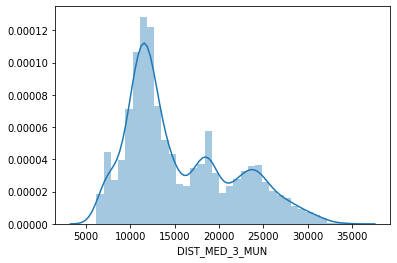

In [23]:
sns.distplot(dataframe.DIST_MED_3_MUN)

7 - Usando OSMnx descargue la informacion sobre caminos dentro del area de cobertura de la distribuidora. Cree variables para las distancias a autopistas (trunk), a caminos primarios (primary) y a caminos secundarios (secondary)

In [44]:
sergipe_mun_graph = ox.graph_from_place(['{}, Sergipe, Brazil'.format(name) for name in dataframe['MUN_NOME'].unique()])

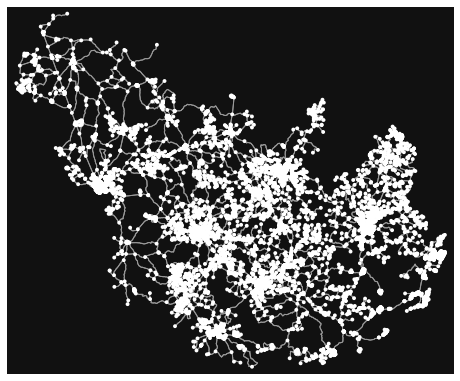

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f00b3209470>)

In [53]:
ox.plot_graph(sergipe_mun_graph)

In [57]:
sergipe_nodes, sergipe_edges = ox.graph_to_gdfs(sergipe_mun_graph)

sergipe_edges

,osmid,highway,oneway,length,name,geometry,lanes,ref,service,maxspeed,bridge,junction,access,tunnel,u,v,key
0,687205210,residential,False,96.074,NaN,"LINESTRING (-37.59274 -11.13871, -37.59197 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692160,6441333975,0
1,277177879,unclassified,False,512.048,Estrada do Povoado 3 Irmaos,"LINESTRING (-37.59274 -11.13871, -37.59290 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692160,2817072106,0
2,792846900,residential,False,319.944,NaN,"LINESTRING (-37.59274 -11.13871, -37.59282 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692160,7413918591,0
3,792846901,unclassified,False,1468.438,NaN,"LINESTRING (-37.59274 -11.13871, -37.59251 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692160,7413918636,0
4,791734650,unclassified,False,549.464,NaN,"LINESTRING (-37.83141 -11.34477, -37.83144 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7401603075,7401180715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,622729873,residential,False,501.220,NaN,"LINESTRING (-37.63314 -11.14379, -37.62877 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692158,5451334454,0
32278,822143198,unclassified,False,183.489,NaN,"LINESTRING (-37.63314 -11.14379, -37.63292 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5881692158,7676462633,0
32279,152695461,residential,False,39.520,Rua Jorge Amado,"LINESTRING (-37.43775 -11.26945, -37.43784 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5287968767,1654910119,0
32280,152695461,residential,False,22.764,Rua Jorge Amado,"LINESTRING (-37.43775 -11.26945, -37.43771 -11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5287968767,5308319884,0


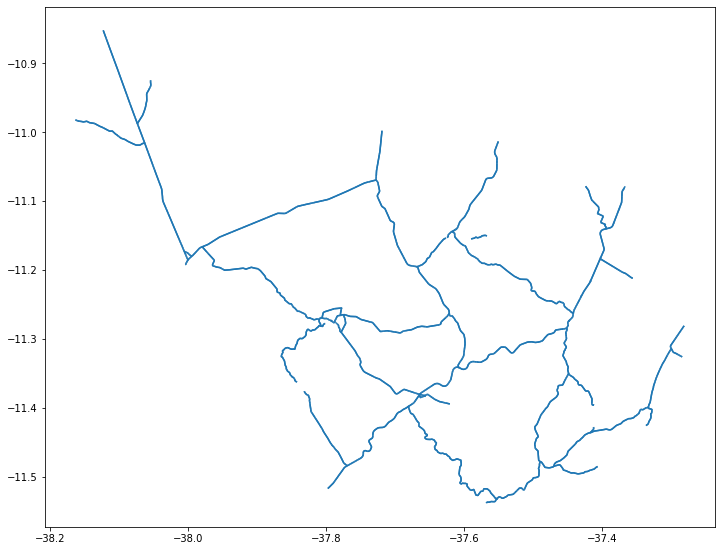

In [93]:
edge_is_trunk = sergipe_edges.highway.str.contains('trunk').fillna(False)
edge_is_primary = sergipe_edges.highway.str.contains('primary').fillna(False)
edge_is_secondary = sergipe_edges.highway.str.contains('secondary').fillna(False)

sergipe_edges[edge_is_trunk | edge_is_primary | edge_is_secondary].plot(figsize=(12,12))

In [95]:
dataframe['DIST_RODOVIA'] = dataframe.distance(sergipe_edges[edge_is_trunk].to_crs(epsg=epsg).unary_union)
dataframe['DIST_ROTA_PRIM'] = dataframe.distance(sergipe_edges[edge_is_primary].to_crs(epsg=epsg).unary_union)
dataframe['DIST_ROTA_SEC'] = dataframe.distance(sergipe_edges[edge_is_secondary].to_crs(epsg=epsg).unary_union)

dataframe

/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/kernel83/miniconda3/envs/diplodatos/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the prefer

,COD_ID,CONJ,MUN,ARE_LOC,geometry,UNI_TR_S,DIC,FIC,CNAE,ENE_01,...,TR_S_ENES_12,DIST_TR,DIST_MED_3_MUN,MUN_NOME,RD_DIST,DIST_RD,DIST_RD_PPAL,DIST_RODOVIA,DIST_ROTA_PRIM,DIST_ROTA_SEC
0,4_1040341,12737,2805802,NU,POINT (627712.617 8776098.670),1_SESAQ_1,7.050,8.0,0,147.0,...,13033788.0,6030.232571,18241.952503,Riachão do Dantas,3868.829691,3868.829691,3868.829691,38373.701987,3868.829691,11224.477570
1,4_1040306,12737,2805802,NU,POINT (626353.418 8777498.606),1_SESAQ_1,5.470,7.0,0,275.0,...,13033788.0,6839.156041,18617.114664,Riachão do Dantas,5529.165862,5529.165862,5529.165862,40313.873787,5529.165862,12665.727038
2,4_1040035,12737,2805802,NU,POINT (635724.137 8773322.662),1_SESAQ_1,7.130,7.0,0,1732.0,...,13033788.0,11259.764183,13765.823350,Riachão do Dantas,1420.588809,1420.588809,1420.588809,31597.046506,1420.588809,3451.504371
3,4_1040036,12737,2805802,NU,POINT (638696.486 8773991.732),1_SESAQ_1,5.190,6.0,0,692.0,...,13033788.0,14306.485778,12396.699472,Riachão do Dantas,1913.237588,1913.237588,617.160885,30843.182190,1913.237588,617.160885
4,4_1040038,12737,2805802,NU,POINT (638310.799 8773035.106),1_SESAQ_1,5.840,7.0,0,1297.0,...,13033788.0,13746.532291,12473.682555,Riachão do Dantas,2745.251017,2745.251017,935.148554,30139.806352,2745.251017,935.148554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8828,8_1080578,12730,2802809,NU,POINT (653013.399 8739601.889),1_SECON_1,21.510,10.0,0,1206.0,...,9212908.0,42143.632643,10910.450468,Umbaúba,2555.253176,2555.253176,2555.253176,4561.250524,2555.253176,6397.556776
8829,8_1080577,12730,2802809,NU,POINT (653309.344 8739968.353),1_SECON_1,21.510,10.0,0,1469.0,...,9212908.0,42073.014416,10994.566945,Umbaúba,2812.121905,2812.121905,2812.121905,4493.888961,2812.121905,6099.269447
8830,12_1120421,12730,2807600,NU,POINT (644710.911 8734252.079),1_SECON_1,21.130,9.0,0,189.0,...,9212908.0,41695.421886,7360.319998,Umbaúba,4651.078995,4651.078995,1876.057361,4651.078995,7379.964565,1876.057361
8831,8_1080557,12730,2802809,NU,POINT (673768.068 8730109.019),1_SECON_1,11.435,6.0,0,69.0,...,9212908.0,63749.096643,20702.279393,Umbaúba,4843.385894,4843.385894,221.537061,9030.421744,4843.385894,221.537061


## Generacion de variables con arboles de busqueda

8 - Cree variables que indique la cantidad de consumidores en radios de 25, 50 y 100 metros del transformador.

9 - Cree una variable indicando la distancia media de cada fila a los 5 untrd mas cercanos.

10 - [Opcional] Usando OSMnx descargue los footprints de edificios disponibles, y cree una variable que indique la cantidad de edificios en un radio de 200 metros al transformador.

In [18]:
from scipy.spatial import cKDTree
import geopandas as gpd

In [19]:
# Cree variables que indique la cantidad de consumidores en radios de 25, 50 y 100 metros del transformador.
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt = ucbt.to_crs(epsg=31984)
ucbt.shape, ssmt.columns

((148801, 40),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [46]:
# Convertimos las coordenas a una matriz
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
untrd_loc_array = [x.coords[0] for x in untrd.geometry]

In [47]:
print(untrd_loc_array[:10])

[(627712.6169779997, 8776098.670127511), (626353.4179798126, 8777498.606078334), (632355.4149737856, 8753247.956105636), (635724.1370160332, 8773322.662057359), (631104.5580278498, 8720058.23505237), (638696.4859638879, 8773991.73208276), (638310.7990282972, 8773035.106081862), (623701.882989638, 8737730.572129583), (638236.557017495, 8772759.907124765), (626993.9699670533, 8775185.16404461)]


In [54]:
radio = 25
radio1 = 50
radio2 = 100
tree = cKDTree(ucbt_loc_array)
near_consumers = tree.query_ball_point(untrd_loc_array, radio)
near_consumers1 = tree.query_ball_point(untrd_loc_array, radio1)
near_consumers2 = tree.query_ball_point(untrd_loc_array, radio2)

In [55]:
print(near_consumers[:10])

[list([100083]) list([104711])
 list([15668, 15669, 15671, 15673, 15674, 15951, 15955, 69473, 69474, 69551, 69553, 122579, 122580])
 list([100959]) list([68479])
 list([100563, 100564, 100719, 100720, 100721, 100722, 110816])
 list([116692, 136261]) list([35337]) list([8748, 91949, 91950]) list([])]


In [51]:
# print("Cantidad de consumidores rurales: ",len(near_consumers_rural))
# print("Cantidad de consumidores intermedios: ",len(near_consumers_intermedio))
# print("Cantidad de consumidores urbanos: ",len(near_consumers_urban))

Cantidad de consumidores rurales:  10508
Cantidad de consumidores intermedios:  10508
Cantidad de consumidores urbanos:  10508


In [64]:
untrd['n_close_con'] = [len(c) for c in near_consumers2]
untrd['is_urb'] =  untrd['n_close_con'] > 50
print(len(untrd[untrd.is_urb == True]))

1201


## Generacion de grafos y calculo de rutas

11 - Usando las tecnicas mostradas en el notebook sobre procesamiento de informacion georeferenciada, construya un grafo basado en la capa de linea de distribicion de media tension:
  - Utilize los puntos de conexion PCON_1 y PCON_2 como nodos, y los segmentos como edges.
  - Adicione COMP y COD_ID como atributos de edge (aristas)
  - Asocie cada transformador untrd con un nodo
  - Asocie cada punto de conexion los circuitos de media tension (CTMT) con la subestacion, a un nodo.

12 - Seleccione al menos 5 metricas de grafo, calcule sus valores para los nodos asociados a cada fila y adicionelos como features al dataset.

13 - [Opcional] Cree convinaciones entre las metricas generando variables adicionales.

14 - Calcule la distancia de cada untrd a su correspondiente punto de conexion con la subestacion, ponderando por COMP (longitud de segmento), utilize el parametro "method" para calcular diferentes tipos de distancias.
Adicione los resultados como variables del dataset.

15 - Calcule la ruta (secuencia de nodos) hasta la conexion con la subestacion, y en base a esta calcule:
 - Resistencia electica total de cada conexion
 - Reactancia electrica de cada conexion.
 [Opcional]
 - Modulo y Angulo de la Impedancia.
 - Corriente Nonimal media a lo largo de la ruta
 - Corriente Maxima media del conductor a lo largo la ruta